In [24]:
#Importing Libraries
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Getting dataset and cleaning it

data = pd.read_csv('pulsar_stars.csv')
data = data.dropna()
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
#Renaming columns
data = data.rename(columns={' Mean of the integrated profile':"mean_profile",
    ' Standard deviation of the integrated profile':"std_profile",
    ' Excess kurtosis of the integrated profile':"kurtosis_profile",
    ' Skewness of the integrated profile':"skewness_profile", 
    ' Mean of the DM-SNR curve':"mean_dmsnr_curve",
    ' Standard deviation of the DM-SNR curve':"std_dmsnr_curve",
    ' Excess kurtosis of the DM-SNR curve':"kurtosis_dmsnr_curve",
    ' Skewness of the DM-SNR curve':"skewness_dmsnr_curve",
})

In [4]:
# Shuffle data
data = data.sample(frac=1)

X = data.drop('target_class', axis=1);
y = data['target_class'];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

1150
11378


### Trainning SVM

In [9]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Trainning Logistic Regression

In [8]:
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Custom Logistic Regression

In [12]:
class logistic_regr(object):

    def __init__(self, learning_rate=0.0001, training_iters=100):
        earning_rate = learning_rate # taxa de aprendizado
        self.training_iters = training_iters # iterações de treino
        
    
    def _logistic(self, X):
        '''Função logística'''
        return  1 / (1 + np.exp(-np.dot(X, self.w_hat)))
    
    
    def fit(self, X_train, y_train):
        
        # formata os dados
        X = X_train.reshape(-1,1) if len(X_train.shape) < 2 else X_train
        X = np.insert(X, 0, 1, 1)
               
        # inicia os parâmetros com pequenos valores aleatórios (nosso chute razoável)
        self.w_hat = np.random.normal(0,1, size = X[0].shape)
        
        # loop de treinamento
        for _ in range(self.training_iters):
            
            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente
            
            # atualiza o gradiente com informação de todos os pontos
            for var in range(len(gradient)):
                gradient[var] += np.dot((self._logistic(X) - y_train), X[:,var])
            
            gradient *= self.learning_rate # multiplica o gradiente pela taxa de aprendizado

            # atualiza os parâmetros
            self.w_hat -= gradient
            
            
    def predict(self, X_test):
        
        # formata os dados
        if len(X_test.shape) < 2:
            X = X_test.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        # aplica função logística
        logit = self._logistic(X) 
        
        # aplica limiar
        return np.greater_equal(logit, 0.5).astype(int)

In [13]:
logistic = logistic_regr()
logistic.fit(X_train, y_train)

ValueError: Shape of passed values is (9, 12528), indices imply (8, 12528)

In [ ]:
y_pred = logistic.predict(X_test)

# Metrics

print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

### Testing SVM

In [13]:
# Making predictions

y_pred = svclassifier.predict(X_test)

# Metrics

print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

Confusion Matrix:
[[161   0]
 [  4  14]]
Classification Report:
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       161
          1       1.00      0.78      0.88        18

avg / total       0.98      0.98      0.98       179

Accuracy: 0.9776536312849162


### Testing Logistic Regression

In [10]:
# Making predictions

y_pred = logreg.predict(X_test)

# Metrics

print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

Confusion Matrix:
[[160   1]
 [  4  14]]
Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       161
          1       0.93      0.78      0.85        18

avg / total       0.97      0.97      0.97       179

Accuracy: 0.9720670391061452


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2);
dataRed2 = pd.DataFrame(pca.fit_transform(data));
dataRed2.head()

,0,1
0,-40.404288,-21.386218
1,-59.532060,-22.255101
2,-119.718513,53.078748
3,-39.803158,-21.099632
4,136.933237,-0.776720


In [35]:
dataRed2['target_class'] = data['target_class'];
dataRed2.head()

,0,1,target_class
0,-40.404288,-21.386218,0
1,-59.532060,-22.255101,0
2,-119.718513,53.078748,0
3,-39.803158,-21.099632,0
4,136.933237,-0.776720,0


<IPython.core.display.Javascript object>


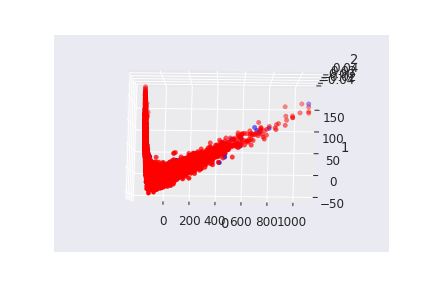

In [36]:
from mpl_toolkits.mplot3d import Axes3D

positive2 = dataRed2[dataRed2['target_class'] == 1];
negative2 = dataRed2[dataRed2['target_class'] == 0];

threedee = plt.figure().gca(projection='3d')
# threedee.scatter(positive[0], positive[1], positive[2], color='b')
# threedee.scatter(negative[0], negative[1], negative[2], color='r')

threedee.scatter(positive2[0], positive2[1], color='b')
threedee.scatter(negative2[0], negative2[1], color='r')
threedee.set_xlabel('0')
threedee.set_ylabel('1')
threedee.set_zlabel('2')
plt.show()

<IPython.core.display.Javascript object>


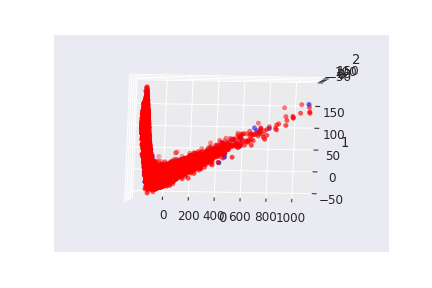

In [38]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3);
dataRed3 = pd.DataFrame(pca.fit_transform(data));
dataRed3.head()

dataRed3['target_class'] = data['target_class'];

positive3 = dataRed3[dataRed3['target_class'] == 1];
negative3 = dataRed3[dataRed3['target_class'] == 0];

threedee = plt.figure().gca(projection='3d')
# threedee.scatter(positive[0], positive[1], positive[2], color='b')
# threedee.scatter(negative[0], negative[1], negative[2], color='r')

threedee.scatter(positive3[0], positive3[1], positive3[2], color='b')
threedee.scatter(negative3[0], negative3[1], negative3[2], color='r')
threedee.set_xlabel('0')
threedee.set_ylabel('1')
threedee.set_zlabel('2')
plt.show()